In [2]:
import pandas as pd
import numpy as np
import pylidc as pl
import matplotlib.pyplot as plt
import os

from pylidc.utils import consensus
from tqdm import tqdm

In [3]:
# import zipfile
# with zipfile.ZipFile("./Base_LIDC-IDRI/manifest-1654468191362.zip","r") as zip_ref:
#     zip_ref.extractall("./Base_LIDC-IDRI/")

In [4]:
DICOM_DIR = "/home/mainlab1/TCCPauloLucas/Base_LIDC-IDRI/LIDC-IDRI"
CONFIDENCE_LEVEL = 0.5
PADDING_SIZE = 512

In [5]:
df = pd.read_csv(f"/home/mainlab1/TCCPauloLucas/Base_LIDC-IDRI/metadata.csv")
df.head(3)

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615202213033480003264,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.101370605276...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,140,74,11 MB,.\LIDC-IDRI\LIDC-IDRI-0003\01-01-2000-NA-NA-94...,2022-06-05T20:43:45.902
1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0001,1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,133,70,33 MB,.\LIDC-IDRI\LIDC-IDRI-0001\01-01-2000-NA-NA-30...,2022-06-05T20:43:45.902
1.3.6.1.4.1.14519.5.2.1.6279.6001.619372068417051974713149104919,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0002,1.3.6.1.4.1.14519.5.2.1.6279.6001.490157381160...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,261,137,73 MB,.\LIDC-IDRI\LIDC-IDRI-0002\01-01-2000-NA-NA-98...,2022-06-05T20:44:11.474


In [6]:
s = f"""[dicom]
path = {DICOM_DIR}
warn = True"""

with open('/home/mainlab1/.pylidcrc', 'w') as f:
    f.write(s)

In [7]:
LIDC_IDRI_list= [f for f in os.listdir(DICOM_DIR) if f.startswith('LIDC')]
LIDC_IDRI_list.sort()

In [8]:
len(LIDC_IDRI_list)

380

In [36]:
pid = 'LIDC-IDRI-0250' 
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
nodules_annotations = scan.cluster_annotations()
vol = scan.to_volume()

Loading dicom files ... This may take a moment.


In [37]:
type(scan)

pylidc.Scan.Scan

In [38]:
print(f"Slice thickness: {scan.slice_thickness} mm")
print(f"Slice spacing: {scan.slice_spacing} mm")

Slice thickness: 2.5 mm
Slice spacing: 2.5 mm


In [39]:
len(nodules_annotations)

3

In [40]:
nodules_annotations

[[Annotation(id=1968,scan_id=250),
  Annotation(id=1970,scan_id=250),
  Annotation(id=1973,scan_id=250),
  Annotation(id=1975,scan_id=250)],
 [Annotation(id=1967,scan_id=250),
  Annotation(id=1969,scan_id=250),
  Annotation(id=1972,scan_id=250),
  Annotation(id=1976,scan_id=250)],
 [Annotation(id=1971,scan_id=250), Annotation(id=1974,scan_id=250)]]

In [41]:
consensus_mask, cbbox, masks = consensus(nodules_annotations[0], CONFIDENCE_LEVEL, PADDING_SIZE)

In [42]:
print(f'Type of mask: {type(consensus_mask)} \nType of cbox: {type(cbbox)} \nType of masks: {type(masks)}')
print(f"Type of each element from masks: {type(masks[0])}, length of masks: {len(masks)}")

Type of mask: <class 'numpy.ndarray'> 
Type of cbox: <class 'tuple'> 
Type of masks: <class 'list'>
Type of each element from masks: <class 'numpy.ndarray'>, length of masks: 4


In [43]:
print(f"Image shape: {vol.shape}")
print(f"Consensus mask shape: {consensus_mask.shape}")
print(f"Annotated masks shape: {[mask.shape for mask in masks]}")

Image shape: (512, 512, 133)
Consensus mask shape: (512, 512, 133)
Annotated masks shape: [(512, 512, 133), (512, 512, 133), (512, 512, 133), (512, 512, 133)]


In [44]:
for slice_idx, each_slice in enumerate(consensus_mask.transpose(2,0,1)):
    if np.any(each_slice):
        print(slice_idx)

84
85
86
87
88


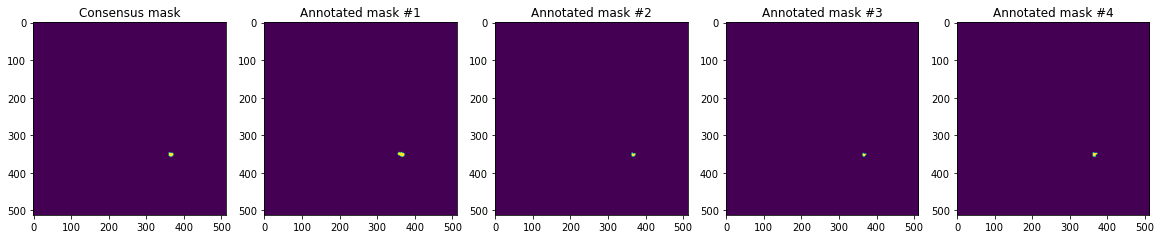

In [45]:
# Displaying slice 89 of consensus_mask and of each annotated mask
fig, ax = plt.subplots(1, len(masks) + 1, figsize=(20,20))
slice_idx = 85
ax[0].imshow(consensus_mask[:,:,slice_idx])
ax[0].set_title('Consensus mask')
for idx, mask in enumerate(masks):
    ax[idx + 1].imshow(mask[:,:,slice_idx])
    ax[idx + 1].set_title(f'Annotated mask #{idx + 1}')

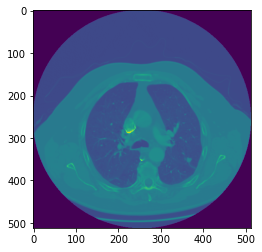

In [46]:
plt.imshow(vol[:,:,slice_idx])

In [22]:
for patient in tqdm(LIDC_IDRI_list):
    pid = patient
    scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
    if scan.slice_thickness <= 2.5:
        nodules_annotations = scan.cluster_annotations()
        vol = scan.to_volume(verbose=False)
        aggregated_mask = np.full(vol.shape, 0,dtype='bool')
        for nodule_annotation in nodules_annotations:
        # Call nodule images. Each Patient will have at maximum 4 annotations as there are only 4 doctors
        # This current for loop iterates over total number of nodules in a single patient
            if len(nodule_annotation) > 2:
                consensus_mask, _, _ = consensus(nodule_annotation, CONFIDENCE_LEVEL, PADDING_SIZE)
                if consensus_mask.shape != vol.shape:
                    print("Mask and image with differente shapes.")
                    continue
                aggregated_mask += consensus_mask
        np.save(f'./LIDC-IDRI_data/masks/{pid}.npy', aggregated_mask)
        np.save(f'./LIDC-IDRI_data/images/{pid}.npy', vol)

  8%|▊         | 30/380 [01:07<13:31,  2.32s/it]

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


 10%|▉         | 37/380 [01:25<13:14,  2.32s/it]


OSError: Not enough free space to write 78118912 bytes

In [22]:
# How many mask slices have at least one pixel with value equal to 1?
count_with_mask = 0
count_slices = 0
mask_dir = './LIDC-IDRI_data/masks/'

for mask_path in os.listdir(mask_dir):
    mask_vol = np.load(mask_dir + mask_path)
    for each_slice in mask_vol.transpose(2,0,1):
        count_slices+=1
        if each_slice.any():
            count_with_mask+=1
print(f"{count_with_mask} slices with a mask, which represents {100*count_with_mask/count_slices:.2f}% of the total.")

2388 slices with a mask, which represents 4.68% of the total.
